In [624]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from torchvision import models
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToPILImage, Resize, ToTensor
from dataloader import ImageDataset
from models import *
from train import train
from test import test

%reload_ext autoreload
%autoreload 2

In [535]:
train_ds = ImageDataset('./data/train/') 
test_ds = ImageDataset('./data/test/')
print(len(train_ds), len(test_ds))
print(train_ds.counts)
print(test_ds.counts)

23708 9779
{(0, 0): 2088, (0, 1): 2407, (1, 0): 5925, (1, 1): 6580, (2, 0): 3487, (2, 1): 1522, (3, 0): 891, (3, 1): 808}
{(0, 0): 1902, (0, 1): 2204, (1, 0): 940, (1, 1): 1754, (2, 0): 1093, (2, 1): 886, (3, 0): 437, (3, 1): 563}


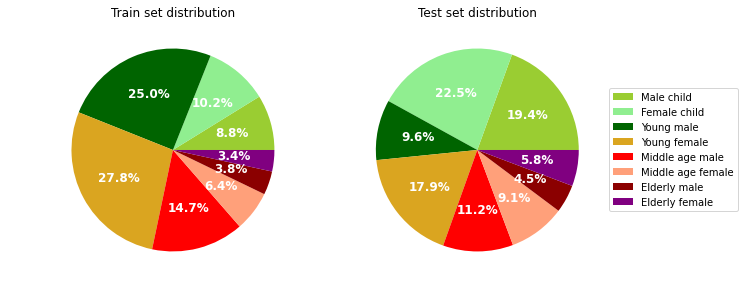

In [665]:
labels = ['Male child', 'Female child', 'Young male', 'Young female', 
'Middle age male', 'Middle age female', 'Elderly male', 'Elderly female']
sizes1 = [2088, 2407, 5925, 6580, 3487, 1522, 891, 808]
sizes2 = [1902, 2204, 940, 1754, 1093, 886, 437, 563]

fig, ax = plt.subplots(1, 2, figsize=(10, 8))
patches, texts, autotexts = ax[0].pie(sizes1, explode=[0]*8, labels=labels,
        colors=['yellowgreen', 'lightgreen', 'darkgreen',
                'goldenrod', 'red', 'lightsalmon', 'darkred','purple'],
      autopct='%.1f%%', textprops={'color':"w"})
plt.setp(autotexts, size='large', weight='bold')
ax[0].title.set_text('Train set distribution')

patches, texts, autotexts = ax[1].pie(sizes2, explode=[0]*8, labels=labels,
        colors=['yellowgreen', 'lightgreen', 'darkgreen',
                'goldenrod', 'red', 'lightsalmon', 'darkred','purple'],
      autopct='%.1f%%', textprops={'color':"w"})
plt.setp(autotexts, size='large', weight='bold')
ax[1].legend(loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
ax[1].title.set_text('Test set distribution')

plt.show()

In [536]:
model = models.resnet18(pretrained=True)
num_feat = model.fc.in_features
model.fc = nn.Linear(num_feat, 8) 
model.load_state_dict(torch.load('resnet18_utk.pt'))

<All keys matched successfully>

In [562]:
G2 = Generator().to('cuda')
D2 = Discriminator().to('cuda')

G2_losses, D2_losses = train(G2, D2, model, './data/train/', device='cuda', 
                             batch_size=32, epochs=30, lr=5e-4, lim=4096)

epoch: 1, gen_loss: 6.598148345947266,  dis_loss: 2.63206148147583, elapsed: 109.75 s
epoch: 2, gen_loss: 6.70603084564209,  dis_loss: 2.538851261138916, elapsed: 222.69 s
epoch: 3, gen_loss: 6.256408214569092,  dis_loss: 1.6776585578918457, elapsed: 335.76 s
epoch: 4, gen_loss: 8.342758178710938,  dis_loss: 1.7534701824188232, elapsed: 448.67 s
epoch: 5, gen_loss: 7.328920841217041,  dis_loss: 1.6165616512298584, elapsed: 561.63 s
epoch: 6, gen_loss: 8.284148216247559,  dis_loss: 1.8882458209991455, elapsed: 674.57 s
epoch: 7, gen_loss: 7.9776482582092285,  dis_loss: 1.538023591041565, elapsed: 787.50 s
epoch: 8, gen_loss: 7.3431572914123535,  dis_loss: 1.4819071292877197, elapsed: 900.45 s
epoch: 9, gen_loss: 9.896984100341797,  dis_loss: 2.0298638343811035, elapsed: 1013.43 s
epoch: 10, gen_loss: 8.893056869506836,  dis_loss: 1.6103992462158203, elapsed: 1126.64 s
epoch: 11, gen_loss: 8.840559005737305,  dis_loss: 1.2731457948684692, elapsed: 1244.07 s
epoch: 12, gen_loss: 7.7601523

In [253]:
G3 = Generator().to('cuda')
D3 = Discriminator().to('cuda')

G3_losses, D3_losses = train(G3, D3, model, './data/train/', device='cuda', 
                             batch_size=32, epochs=30, lr=5e-4, lim=8192)

epoch: 1, gen_loss: 7.4067277908325195,  dis_loss: 2.3864498138427734, elapsed: 225.11 s
epoch: 2, gen_loss: 7.0645904541015625,  dis_loss: 1.8439741134643555, elapsed: 450.65 s
epoch: 3, gen_loss: 7.547470569610596,  dis_loss: 2.5326337814331055, elapsed: 676.27 s
epoch: 4, gen_loss: 8.129566192626953,  dis_loss: 1.512941837310791, elapsed: 901.83 s
epoch: 5, gen_loss: 7.635873317718506,  dis_loss: 2.0849647521972656, elapsed: 1127.37 s
epoch: 6, gen_loss: 7.866147994995117,  dis_loss: 1.657336711883545, elapsed: 1352.94 s
epoch: 7, gen_loss: 7.706358432769775,  dis_loss: 2.172395706176758, elapsed: 1578.44 s
epoch: 8, gen_loss: 8.879846572875977,  dis_loss: 1.3764764070510864, elapsed: 1803.95 s
epoch: 9, gen_loss: 8.002084732055664,  dis_loss: 1.7398393154144287, elapsed: 2029.47 s
epoch: 10, gen_loss: 8.345697402954102,  dis_loss: 2.2081851959228516, elapsed: 2255.02 s
epoch: 11, gen_loss: 8.200054168701172,  dis_loss: 1.414198875427246, elapsed: 2480.65 s
epoch: 12, gen_loss: 6.58

In [254]:
G4 = Generator().to('cuda')
D4 = Discriminator().to('cuda')

G4_losses, D4_losses = train(G4, D4, model, './data/train/', device='cuda', 
                             batch_size=32, epochs=30, lr=5e-4)

epoch: 1, gen_loss: 8.467231750488281,  dis_loss: 2.718242645263672, elapsed: 274.53 s
epoch: 2, gen_loss: 7.922232627868652,  dis_loss: 1.4863011837005615, elapsed: 549.42 s
epoch: 3, gen_loss: 7.479116439819336,  dis_loss: 1.743665337562561, elapsed: 824.21 s
epoch: 4, gen_loss: 7.830624580383301,  dis_loss: 1.3360859155654907, elapsed: 1099.38 s
epoch: 5, gen_loss: 8.319353103637695,  dis_loss: 1.9964531660079956, elapsed: 1374.19 s
epoch: 6, gen_loss: 9.32397747039795,  dis_loss: 1.3185073137283325, elapsed: 1649.00 s
epoch: 7, gen_loss: 9.395334243774414,  dis_loss: 1.532259464263916, elapsed: 1923.83 s
epoch: 8, gen_loss: 8.268180847167969,  dis_loss: 1.9585189819335938, elapsed: 2198.64 s
epoch: 9, gen_loss: 7.384883403778076,  dis_loss: 1.746452808380127, elapsed: 2473.52 s
epoch: 10, gen_loss: 9.113408088684082,  dis_loss: 1.6590346097946167, elapsed: 2748.33 s
epoch: 11, gen_loss: 8.497540473937988,  dis_loss: 1.2437100410461426, elapsed: 3023.17 s
epoch: 12, gen_loss: 10.678

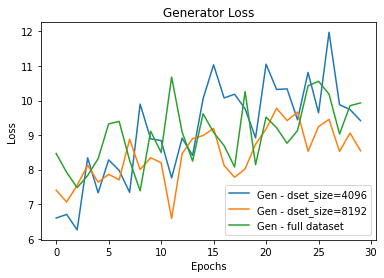

In [563]:
plt.plot(list(range(30)), G2_losses, label='Gen - dset_size=4096')
plt.plot(list(range(30)), G3_losses, label='Gen - dset_size=8192')
plt.plot(list(range(30)), G4_losses, label='Gen - full dataset')
plt.title('Generator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

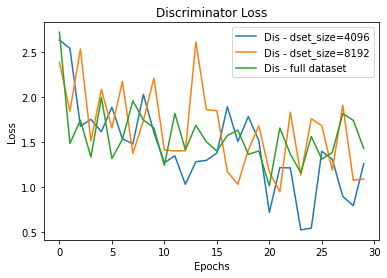

In [564]:
plt.plot(list(range(30)), D2_losses, label='Dis - dset_size=4096')
plt.plot(list(range(30)), D3_losses, label='Dis - dset_size=8192')
plt.plot(list(range(30)), D4_losses, label='Dis - full dataset')
plt.title('Discriminator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [580]:
test_ds = ImageDataset('./data/test/')
loader = DataLoader(test_ds, batch_size=32, shuffle=True)
G.to('cuda')
model.to('cuda')
model.eval()
G.eval()
test_dict = defaultdict(int, {i:0 for i in range(8)})
perclass_correct = [0]*8
perclass_totals = [0]*8
correct = 0
total = len(test_ds)

with torch.no_grad():
      for batch, (image, label) in enumerate(loader):
            image = image.to('cuda')
            label = label.cpu().numpy()
            out = model(image)
            _, preds = torch.max(out, 1)
            preds = preds.detach().cpu().numpy()
            for i,j in zip(preds, label):
                perclass_totals[j] += 1
                if i==j:
                    perclass_correct[i] += 1
            correct += np.sum(np.equal(preds, label))
print(f'Total Acc: {100 * correct / total}%')
print('Per class Acc:')
for idx, i in enumerate(test_ds.keys):
    print(f'{test_ds.classes[i]}: {100 * perclass_correct[idx] / perclass_totals[idx]}')

Total Acc: 96.53338787197055%
Per class Acc:
male child: 97.42376445846477
female child: 96.91470054446461
young male: 97.02127659574468
young female: 98.97377423033068
middle age male: 92.31473010064045
middle age female: 90.85778781038374
elderly male: 99.08466819221968
elderly female: 98.75666074600355


In [566]:
test(G2, model)

Total Acc: 51.968503937007874%
Per class Acc:
male child: 78.39116719242902
female child: 33.48457350272232
young male: 61.702127659574465
young female: 95.72405929304448
middle age male: 0.6404391582799634
middle age female: 0.33860045146726864
elderly male: 95.19450800915332
elderly female: 29.840142095914743


In [567]:
test(G3, model)

Total Acc: 67.46088557112179%
Per class Acc:
male child: 81.54574132492114
female child: 63.38475499092559
young male: 90.42553191489361
young female: 94.81185860889396
middle age male: 12.900274473924977
middle age female: 26.975169300225733
elderly male: 98.39816933638444
elderly female: 57.90408525754884


In [568]:
test(G4, model)

Total Acc: 33.275386031291546%
Per class Acc:
male child: 29.284963196635122
female child: 8.212341197822141
young male: 69.25531914893617
young female: 79.64652223489168
middle age male: 0.36596523330283626
middle age female: 0.22573363431151242
elderly male: 93.82151029748283
elderly female: 9.236234458259325


In [629]:
def show_pred(G, model):
    test = ImageDataset('./data/test/')
    test_loader = DataLoader(test, batch_size=4, shuffle=True)

    f, ax = plt.subplots(2, 4, figsize=(12, 5))
    image, label = next(iter(test_loader))
    for i in range(4):
        im_pil = ToPILImage()(image[i])
        im = torch.unsqueeze(image[i].to('cuda'), 0)
        lb = label[i]
        pert = torch.clamp(Resize(128)(G(im)), 2, 4)
        adv = torch.clamp(im + pert, 2, 4)
        idx, preds = torch.max(torch.nn.Softmax(dim=1)(model(adv)), 1)
        trick_pil = ToPILImage()(adv.squeeze())

        ax[0,i].title.set_text(f'True class: {test.classes[test.keys[lb.item()]]}')
        ax[0,i].axis('off')
        ax[0,i].imshow(im_pil)
        ax[1,i].title.set_text(f'Pred: {test.classes[test.keys[preds.item()]]} ({idx.item():.2f})')
        ax[1,i].axis('off')
        ax[1,i].imshow(trick_pil)
    plt.show()

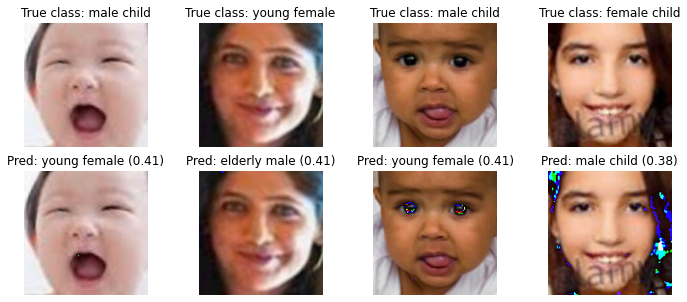

In [671]:
show_pred(G2, model)

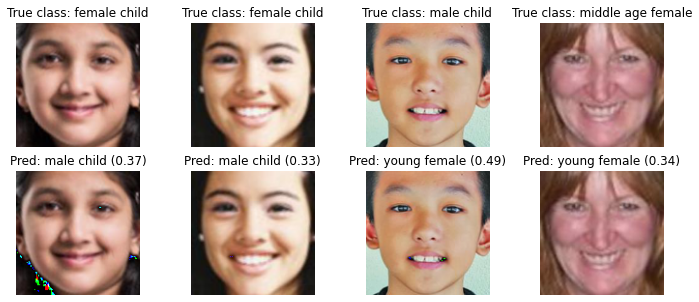

In [592]:
show_pred(G3, model)

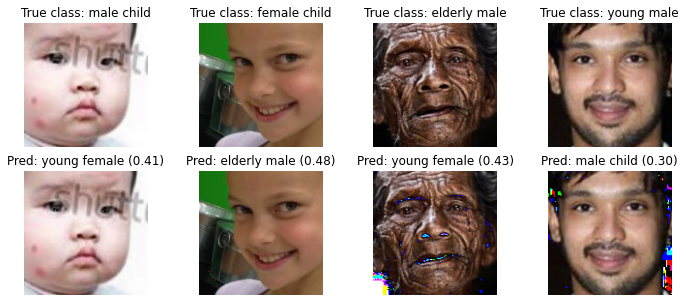

In [591]:
show_pred(G4, model)

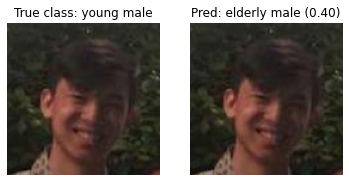

In [630]:
from torchvision.io import read_image
image = read_image('./data/adam/adam.jpg')
image = torch.unsqueeze(Resize([128, 128])(ToTensor()(ToPILImage()(image))), 0)
image_pil = ToPILImage()(image[0].squeeze())
pert = Resize(128)(G4(image.to('cuda')))
adv = image.to('cuda') + torch.clamp(pert, 2, 4)
trick_pil = ToPILImage()(adv[0].squeeze())
idx, preds = torch.max(torch.nn.Softmax(dim=1)(model(adv)), 1)
f, ax = plt.subplots(1,2)
ax[0].title.set_text(f'True class: {train_ds.classes[train_ds.keys[2]]}')
ax[0].axis('off')
ax[0].imshow(image_pil)
ax[1].title.set_text(f'Pred: {train_ds.classes[train_ds.keys[preds.item()]]} ({idx.item():.2f})')
ax[1].axis('off')
ax[1].imshow(trick_pil)

plt.show()